In [2]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from skimage.segmentation import find_boundaries

### LEER DECON O5

In [4]:
file_cc="/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E1/20190404_E1_mGFP_CardiacRegion_0.5.nii.gz"
cc_20190404_E1 = nib.load(file_cc).get_fdata()
cc_20190404_E1.shape

(877, 829, 526, 1)

In [5]:
cc_20190404_E1 = cc_20190404_E1[:,:,:,0]
cc_20190404_E1.shape

(877, 829, 526)

## LEER PMAP

In [6]:
folder_pnas="/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/PNAS"
mem_20190404_E1_pnas = nib.load(os.path.join(folder_pnas, '20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz')).get_fdata()
mem_20190404_E1_pnas.shape

(1, 526, 877, 829)

In [7]:
mem_20190404_E1_pnas = mem_20190404_E1_pnas[0,:,:,:]
mem_20190404_E1_pnas.shape

(526, 877, 829)

### LEER GASP

In [4]:
file = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/20190401_E2_mGFP_CardiacRegion_0.5_ZYX_predictions_GASP.nii.gz"

In [5]:
gasp_seg = nib.load(file).get_fdata()
gasp_seg.shape

(480, 881, 900)

In [6]:
np.swapaxes(np.swapaxes(gasp_seg, 0, 2), 0, 1).shape

(881, 900, 480)

In [7]:
ni_img = nib.Nifti1Image(np.swapaxes(np.swapaxes(gasp_seg, 0, 2), 0, 1), affine=np.eye(4))
nib.save(ni_img, file.replace("ZYX", "XYZ"))

### LEER MULTICUT

In [15]:
fiile = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/MULTICUT_PNAS/20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions_MULTICUT.nii.gz"

In [16]:
multicut_seg = nib.load(fiile).get_fdata()
multicut_seg.shape

(526, 877, 829)

In [24]:
ni_img = nib.Nifti1Image(np.swapaxes(np.swapaxes(multicut_seg, 0, 2), 0, 1), affine=np.eye(4))
nib.save(ni_img, fiile.replace("ZYX", "XYZ"))

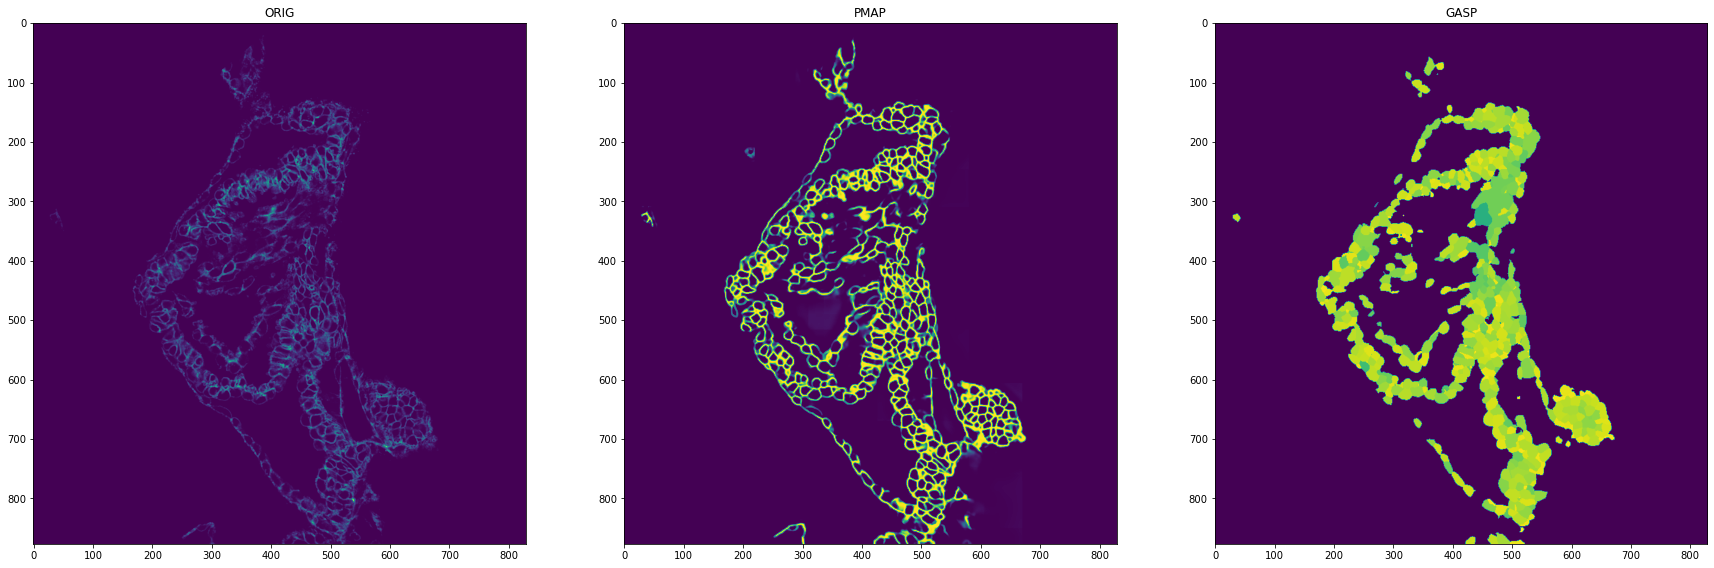

In [15]:
for t in range(51):
    plt.figure(figsize=(30,30)) 
    n = 150 #10*t
    plots = [cc_20190404_E1[:,:,n],
             #multicut_seg[n, :, :],  
             mem_20190404_E1_pnas[n, :, :], 
             gasp_seg[n, :, :], 
             ]
    titles = ["ORIG","PMAP", "GASP"]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

In [25]:
len(np.unique(gasp_seg))

11571

In [26]:
len(np.unique(multicut_seg))

11760